In [127]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50
import matplotlib.pyplot as plt
import random

In [145]:
model_path = 'cifar10_improved_model_50.h5' 
auroc_threshold=0.7801

# List of class names in CIFAR-10 dataset
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [129]:
# Load your trained model
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

In [147]:
# Preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array, img 

In [146]:
# Function to check and display the loaded image
def check_loaded_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [148]:
# Function to calculate the OOD score
def calculate_ood_score(model, image):
    predictions = model(image)
    class_scores = predictions.numpy()[0]
    
    predicted_class_idx = np.argmax(class_scores)  # Index of the highest prediction score
    predicted_class_name = class_names[predicted_class_idx]  # Get the class name
    ood_score = class_scores[predicted_class_idx]
    
    return ood_score, class_scores 

In [151]:
# Main function to classify the image and check if it is OOD
def classify_image(image_path, model):

    img_array, img = preprocess_image(image_path)

    check_loaded_image(img)

    ood_score, class_scores = calculate_ood_score(model, img_array)

    predicted_class_name = None

    # Check if the OOD score is below the threshold
    if ood_score < auroc_threshold:
        print("Out of Distribution")
        print(f"OOD Score: {ood_score:.4f}")
        for i, score in enumerate(class_scores):
            print(f"{class_names[i]}: {score:.4f}")
    else:
        predicted_class_idx = np.argmax(model(img_array).numpy())  # Get the class with the highest probability
        predicted_class_name = class_names[predicted_class_idx]  # Get the class name
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Prediction Score: {ood_score:.4f}")

In [134]:
model = load_model(model_path)

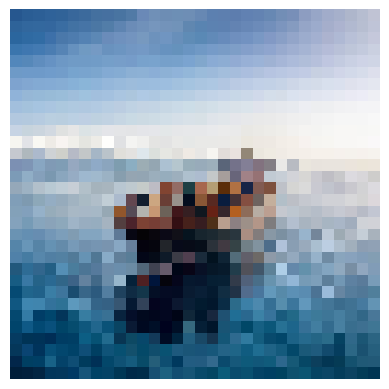

Out of Distribution
OOD Score: 0.4608
airplane: 0.2070
automobile: 0.0001
bird: 0.0057
cat: 0.0004
deer: 0.0304
dog: 0.0000
frog: 0.2925
horse: 0.0001
ship: 0.4608
truck: 0.0031


In [135]:
# image_path = 'photos/dog.jpg'
# image_path = 'photos/plane.jpg'
# image_path = 'photos/flower.jpg'
# image_path = 'photos/girl.jpg'
image_path = 'photos/ship.jpg'

classify_image(image_path, model)

In [136]:
# List of class names in CIFAR-100 dataset
class_names_cifar100 = [
    'apple', 'aquarium_fish', 'baby', 'backpack', 'banana', 'baseball_bat', 'beetle', 'bicycle', 'bottle', 'bowl',
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair',
    'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dog',
    'donut', 'dragonfly', 'electric_guitar', 'elephant', 'flatfish', 'forest', 'fox', 'frog', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'rabbit', 'railroad_train', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snake', 'spider', 'squirrel', 'starfish',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'tropical_fish', 'truck', 'umbrella', 'watch', 'waterfall', 'whale', 'wheat', 'zebra'
]

In [137]:
# Preprocess the CIFAR image 
def preprocess_images_cifar(image_array):
    img_array = np.expand_dims(image_array, axis=0)
    img_array = img_array / 255.0  
    return img_array

In [149]:
def check_loaded_images_cifar(img_array):
    img_array_display = np.squeeze(img_array) * 255.0
    plt.figure(figsize=(2, 2)) 
    plt.imshow(img_array_display.astype(np.uint8))
    plt.axis('off') 
    plt.show()

In [139]:
# Load CIFAR-10 and CIFAR-100 datasets
(x_train_cifar10, y_train_cifar10), (_, _) = tf.keras.datasets.cifar10.load_data()
(x_train_cifar100, y_train_cifar100), (_, _) = tf.keras.datasets.cifar100.load_data()

In [150]:
# Main function to classify the image and check if it is OOD
def classify_images_cifar(image_array, model, class_names, auroc_threshold=0.7801):

    img_array = preprocess_images_cifar(image_array)

    check_loaded_images_cifar(image_array)

    ood_score, class_scores = calculate_ood_score(model, img_array)

    predicted_class_name = None

    # Check if the OOD score is below the threshold
    if ood_score < auroc_threshold:
        print("Out of Distribution")
        for i, score in enumerate(class_scores):
            print(f"{class_names[i]}: {score:.4f}")
    else:
        predicted_class_idx = np.argmax(model(img_array).numpy())  # Get the class with the highest probability
        predicted_class_name = class_names[predicted_class_idx]  # Get the class name
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Prediction Score: {ood_score:.4f}")
    return predicted_class_name

In [143]:
def get_and_classify_random_images(amount, model, cifar10_data, cifar100_data, class_names_cifar10, class_names_cifar100, auroc_threshold=0.7801):
    
    for i in range(5):
        cifar10_idx = random.randint(0, len(cifar10_data[0]) - 1)
        cifar10_image = cifar10_data[0][cifar10_idx]
        cifar10_true_label = cifar10_data[1][cifar10_idx].item()
        print(f"\nClassifying CIFAR-10 image (True Class: {class_names_cifar10[cifar10_true_label]})")
        predict_class_cifar10 = classify_images_cifar(cifar10_image, model, class_names_cifar10, auroc_threshold)

    for i in range(5):
        cifar100_idx = random.randint(0, len(cifar100_data[0]) - 1)
        cifar100_image = cifar100_data[0][cifar100_idx]
        cifar100_true_label = cifar100_data[1][cifar100_idx].item() 
        print(f"\nClassifying CIFAR-100 image (True Class: {class_names_cifar100[cifar100_true_label]})")
        predict_class_cifar100 = classify_images_cifar(cifar100_image, model, class_names_cifar100, auroc_threshold)


Classifying CIFAR-10 image (True Class: automobile)


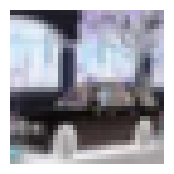

Predicted Class: automobile
Prediction Score: 0.9999

Classifying CIFAR-10 image (True Class: truck)


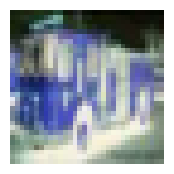

Predicted Class: truck
Prediction Score: 0.9999

Classifying CIFAR-10 image (True Class: ship)


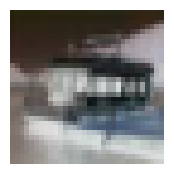

Predicted Class: ship
Prediction Score: 0.9844

Classifying CIFAR-10 image (True Class: automobile)


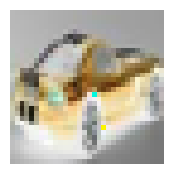

Predicted Class: automobile
Prediction Score: 0.9989

Classifying CIFAR-10 image (True Class: cat)


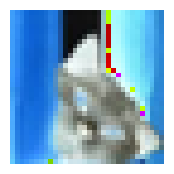

Out of Distribution
airplane: 0.0020
automobile: 0.0007
bird: 0.0364
cat: 0.7756
deer: 0.0000
dog: 0.1446
frog: 0.0051
horse: 0.0352
ship: 0.0000
truck: 0.0002

Classifying CIFAR-100 image (True Class: pear)


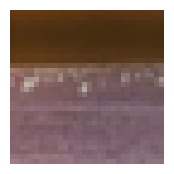

Predicted Class: bottle
Prediction Score: 0.9504

Classifying CIFAR-100 image (True Class: crab)


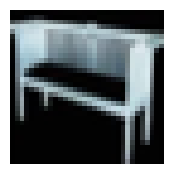

Predicted Class: apple
Prediction Score: 0.9307

Classifying CIFAR-100 image (True Class: cockroach)


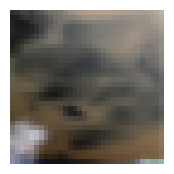

Out of Distribution
apple: 0.3212
aquarium_fish: 0.0001
baby: 0.0020
backpack: 0.0055
banana: 0.0716
baseball_bat: 0.0008
beetle: 0.0041
bicycle: 0.0001
bottle: 0.5881
bowl: 0.0066

Classifying CIFAR-100 image (True Class: bottle)


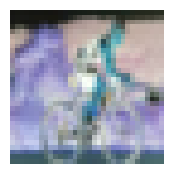

Predicted Class: bicycle
Prediction Score: 0.8936

Classifying CIFAR-100 image (True Class: rabbit)


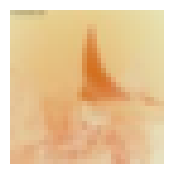

Out of Distribution
apple: 0.6578
aquarium_fish: 0.0000
baby: 0.0531
backpack: 0.0113
banana: 0.0085
baseball_bat: 0.0009
beetle: 0.0056
bicycle: 0.0005
bottle: 0.2621
bowl: 0.0002


In [144]:
amount = 5
get_and_classify_random_images(amount, model, (x_train_cifar10, y_train_cifar10), (x_train_cifar100, y_train_cifar100), class_names_cifar10, class_names_cifar100)